<a href="https://colab.research.google.com/github/PedroJesusBenito/predict-diabetes/blob/main/Proyecto_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos nuestras librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import set_config
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
set_config(display="diagram")

Montamos el drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos nuestro DataSet

In [3]:
archivo = '/content/drive/MyDrive/Data Sets/diabetes.csv'
df = pd.read_csv(archivo)

Comprobamos que se haya cargado de forma correcta

In [4]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


Ahora cargamos nuestro diccionario

Diccionario de datos:

Nombre columna	Tipo de dato	Descripción

Outcome	Int	Diabetes (0 = no, 1 = sí) (objetivo)

Pregnancies	Int	Número de embarazos

Glucose	Int	Concentración de glucosa en plasma

BloodPressure	Int	Presión arterial diastólica (mm Hg)

SkinThickness	Int	Espesor del pliegue cutáneo del tríceps (mm)

Insulin	Int	Insulina sérica de 2 horas (mu U/ml)

BMI	Flotante	Índice de masa corporal

DiabetesPedigreeFunction	Flotante	Función pedigree Diabetes

Age	Int	Edad

Convertimos nuestro diccionario a un DataFrame

In [5]:
diccionario = pd.DataFrame()
diccionario["Nombre columna"] = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
diccionario["Tipo de dato"] = ["int", "int", "int", "int", "int", "flotante", "flotante", "int", "int"]
diccionario["Descripción"] = ["Número de embarazos", "Concentración de glucosa en plasma",
                              "Presión arterial diastólica (mm Hg)", "Espesor del pliegue cutáneo del tríceps (mm)", "Insulina sérica de 2 horas (mu U/ml)",
                              "Índice de masa corporal", "Función pedigree Diabetes", "Edad", "Diabetes (0 = no, 1 = sí) (objetivo)"]

Comprobamos

In [6]:
diccionario

,Nombre columna,Tipo de dato,Descripción
0,Pregnancies,int,Número de embarazos
1,Glucose,int,Concentración de glucosa en plasma
2,BloodPressure,int,Presión arterial diastólica (mm Hg)
3,SkinThickness,int,Espesor del pliegue cutáneo del tríceps (mm)
4,Insulin,int,Insulina sérica de 2 horas (mu U/ml)
5,BMI,flotante,Índice de masa corporal
6,DiabetesPedigreeFunction,flotante,Función pedigree Diabetes
7,Age,int,Edad
8,Outcome,int,"Diabetes (0 = no, 1 = sí) (objetivo)"


Perfecto, ahora podemos comenzar nuestro EDA y para eso lo primero que vamos a hacer es ver la información general de nuestro conjunto de datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Podemos ver que tenemos un DataFrame pequeño, con 768 registros y 9 características, sin datos nulos. Vamos a buscar duplicados

In [8]:
df.duplicated().sum()

0

Tampoco tenemos datos duplicados, por lo tanto, vamos a buscar inconsistencias en los datos y errores por columna

In [9]:
diccionario.iloc[0:1,:]

,Nombre columna,Tipo de dato,Descripción
0,Pregnancies,int,Número de embarazos


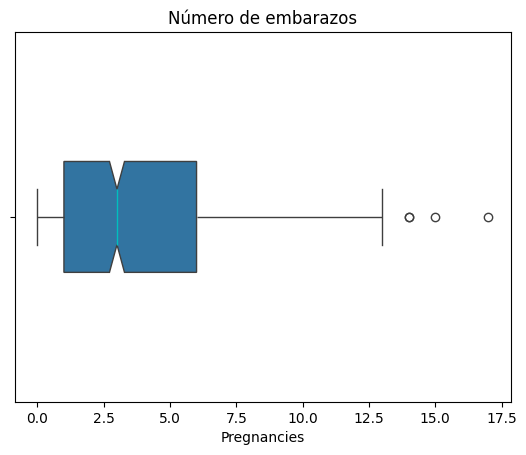

In [10]:
sns.boxplot(x=df["Pregnancies"], data=df,notch = True,
            linewidth=1,
            medianprops={"color": "c", "linewidth": 1},
            width=0.3).set_title("Número de embarazos")

plt.show();

In [11]:
df["Pregnancies"].unique()[df["Pregnancies"].unique() > 12]

array([13, 15, 17, 14])

Podemos ver que tenemos 4 valores outliers, siendo el máximo 17 el cual es un valor muy alto para la cantidad de embarazos de una mujer sana o si consideramos que los embarazos llegaron a término. Sin embargo, si consideramos que nuestros datos están relacionados a la diabetes y que las mujeres con diabetes tienen una probabilidad mayor de tener abortos espontáneos[(Fuente)](https://www.cdc.gov/pregnancy/spanish/diabetes-types.html), estos datos parecen correctos y pueden ser un indicador de que la persona presenta efectivamente esta enfermedad

In [12]:
diccionario.iloc[1:2,:]

,Nombre columna,Tipo de dato,Descripción
1,Glucose,int,Concentración de glucosa en plasma


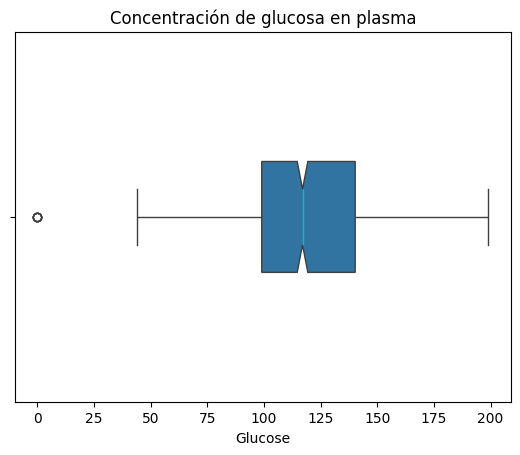

In [13]:
sns.boxplot(x=df["Glucose"], data=df,notch = True,
            linewidth=1,
            medianprops={"color": "c", "linewidth": 1},
            width=0.3).set_title("Concentración de glucosa en plasma")

plt.show();

In [14]:
df["Glucose"][df["Glucose"]==0].value_counts()

0    5
Name: Glucose, dtype: int64

Podemos ver que tenemos sólo un valor outlier(0) y tenemos 5 registros con ese valor. Este es un número extraño, que no se corresponde con la información esperada porque si este valor de concentración de glucosa en sangre(glucosa en plasma es un examen de glucosa en sangre([Fuente](https://medlineplus.gov/spanish/ency/esp_imagepages/19723.htm#:~:text=La%20prueba%20de%20glucosa%20en,12%20horas%20antes%20del%20examen.))), es menor a 54 mg/dL, estamos hablando de casos de hoipoglucemia moderada a grave([Fuente](https://www.msdmanuals.com/es-cl/professional/trastornos-endocrinol%C3%B3gicos-y-metab%C3%B3licos/diabetes-mellitus-y-trastornos-del-metabolismo-de-los-hidratos-de-carbono/hipoglucemia)) y por lo tanto un valor 0 es completamente anormal.

Vamos a visualizar estos registros

In [15]:
df[df["Glucose"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


Podemos ver que en el 80% de estos datos además se presenta un nivel de insulina 0, lo que tampoco es esperado de un ser humano vivo([Fuente](https://www.clinicalascondes.cl/CENTROS-Y-ESPECIALIDADES/Centros/Centro-de-Diabetes/Noticias/Te-puede-interesar/%C2%BFTiene-usted-resistencia-a-la-insulina-#:~:text=Si%20est%C3%A1%20entre%20los%20100,supera%20los%202%2C6%20puntos.)) y por lo tanto podemos ver que estos registros presentan problemas.

Veamos a qué porcentaje de nuestros datos corresponden estos registros

In [16]:
porcentaje = round(df[df["Glucose"]==0].shape[0]*100/df.shape[0],2)
print(f"El porcentaje de los datos erróneos es {porcentaje}%")

El porcentaje de los datos erróneos es 0.65%


Podemos ver que estos datos con información errónea representan menos de un 1% de los datos y por lo tanto los vamos a elimnar

In [17]:
df.drop(labels=list(df[df["Glucose"]==0].index.values), inplace=True)

Comprobamos

In [18]:
df.shape

(763, 9)

Muy bien! Continuamos analizando nuestras columnas

In [19]:
diccionario.iloc[2:3,:]

,Nombre columna,Tipo de dato,Descripción
2,BloodPressure,int,Presión arterial diastólica (mm Hg)


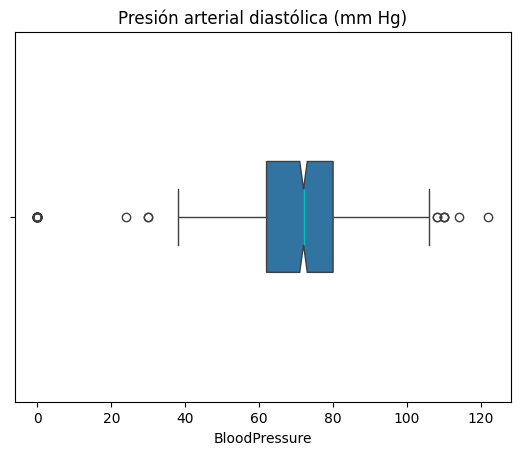

In [20]:
sns.boxplot(x=df["BloodPressure"], data=df,notch = True,
            linewidth=1,
            medianprops={"color": "c", "linewidth": 1},
            width=0.3).set_title("Presión arterial diastólica (mm Hg)")

plt.show();

In [21]:
df["BloodPressure"][df["BloodPressure"] < 40].value_counts()

0     35
30     2
24     1
38     1
Name: BloodPressure, dtype: int64

In [22]:
df["BloodPressure"][df["BloodPressure"] < 40].value_counts().sum()

39

Podemos ver que tenemos 4 valores outliers hacia la izquierda los cuales suman 39 registros, donde el valor 0 es el que más registros concentra con 35 de ellos. Este es un valor erróneo, ninguna persona viva puede tener 0 milígramos de mercurio en la sangre de presión y de hecho la presión diastólica bajo 60 mm Hg se considera una emergencia médica([Fuente](https://www.healthline.com/health/es/tabla-de-presion-arterial#tabla-de-presi%C3%B3n-arterial)) y por lo tanto podemos deducir que aquí hay un error.



In [23]:
df["BloodPressure"][df["BloodPressure"] > 105].value_counts()

110    3
106    3
108    2
122    1
114    1
Name: BloodPressure, dtype: int64

Podimos encontrar 5 valores outliers hacia la derecha, con menos registros cada uno. En estos casos, los valores son altos pero no indican error a excepción del máximo que es 122 el cual representa valores de una crisis hipertensiva([Fuente](https://www.healthline.com/health/es/tabla-de-presion-arterial#tabla-de-presi%C3%B3n-arterial)) y ya que nuestros datos no provienen de los servicios de emergencias sino que del National Institute of Diabetes and Digestive and Kidney Diseases([Fuente](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)), podemos concluir que ese valor también es erróneo.

Veamos qué porcentaje de nuestros datos representan estos registros

In [24]:
df["BloodPressure"][df["BloodPressure"] < 40].value_counts().sum() + df["BloodPressure"][df["BloodPressure"] > 120].value_counts().sum()

40

In [25]:
porcentaje = round((df["BloodPressure"][df["BloodPressure"] < 40].value_counts().sum() + df["BloodPressure"][df["BloodPressure"] > 120].value_counts().sum())*100/df.shape[0],2)
print(f"El porcentaje de los datos erróneos es {porcentaje}%")

El porcentaje de los datos erróneos es 5.24%


Estos datos con problemas representan el 5.24% de nuestros datos y por lo tanto vamos a eliminarlos

In [26]:
df.drop(labels=list(df[df["Glucose"]==0].index.values), inplace=True)

In [27]:
df.drop(labels=list(df[(df["BloodPressure"] < 40) | (df["BloodPressure"] > 120)].index.values), inplace=True)

Comprobamos

In [28]:
df.shape

(723, 9)

Muy bien, continuamos nuestro análisis exploratorio de datos

In [29]:
diccionario.iloc[3:4,:]

,Nombre columna,Tipo de dato,Descripción
3,SkinThickness,int,Espesor del pliegue cutáneo del tríceps (mm)


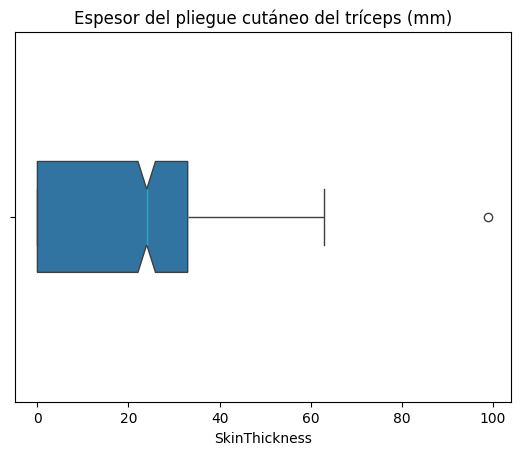

In [30]:
sns.boxplot(x=df["SkinThickness"], data=df,notch = True,
            linewidth=1,
            medianprops={"color": "c", "linewidth": 1},
            width=0.3).set_title("Espesor del pliegue cutáneo del tríceps (mm)")

plt.show();

In [31]:
df["SkinThickness"][df["SkinThickness"] > 90].value_counts()

99    1
Name: SkinThickness, dtype: int64

Podemos ver que tenemos sólo un valor outlier hacia la derecha situado en 99 el cual está presente en un sólo registro.

Aquí hay algunas referencias generales para los valores normales del espesor del pliegue cutáneo del tríceps en milímetros, según la edad y el sexo. Estos valores pueden variar, y es fundamental interpretarlos en el contexto de una evaluación más amplia:

Adultos jóvenes (20-29 años):

Hombres: alrededor de 6-8 mm
Mujeres: alrededor de 16-20 mm
Adultos de mediana edad (30-49 años):

Hombres: alrededor de 8-10 mm
Mujeres: alrededor de 18-22 mm
Adultos mayores (50-59 años y más):

Hombres: alrededor de 10-12 mm
Mujeres: alrededor de 20-25 mm

Podemos ver que este valor está muy por sobre la media y nos hablaría de un sobrepeso importante, así que buscaremos encontrar otro indicador que confirme esa condición


veamos este registro

In [32]:
df[df["SkinThickness"] > 90]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


Podemos ver que esta paciente presenta un BMI de 34.7 el cual habla de una obesidad importante([Fuente](https://www.verival.co.uk/bmi-calculator)). Sabemos que es una mujer ya que este DataSet contiene las evaluaciones sólo de mujeres de 21 años en adelante.

Considerando esto, podemos concluir que este ourlier es un valor correcto y se mantendrá en el DataFrame

In [33]:
diccionario.iloc[4:5,:]

,Nombre columna,Tipo de dato,Descripción
4,Insulin,int,Insulina sérica de 2 horas (mu U/ml)


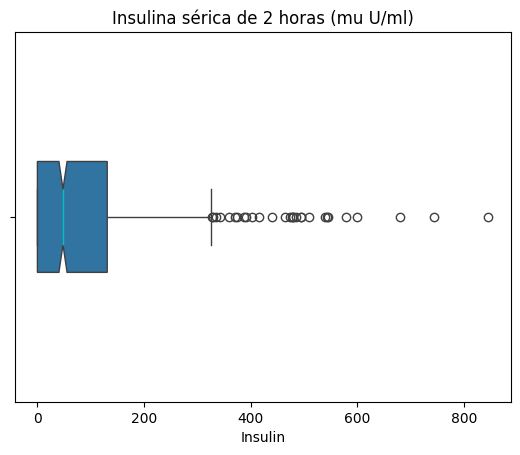

In [34]:
sns.boxplot(x=df["Insulin"], data=df,notch = True,
            linewidth=1,
            medianprops={"color": "c", "linewidth": 1},
            width=0.3).set_title("Insulina sérica de 2 horas (mu U/ml)")

plt.show();

In [35]:
df["Insulin"][df["Insulin"] > 300].value_counts()

325    3
495    2
480    2
543    1
600    1
474    1
328    1
326    1
330    1
440    1
321    1
579    1
540    1
335    1
387    1
392    1
310    1
465    1
415    1
846    1
360    1
545    1
375    1
402    1
680    1
370    1
744    1
478    1
318    1
485    1
304    1
342    1
510    1
Name: Insulin, dtype: int64

Encontramos muchos valores outliers hacia la derecha, los cuales están casi todos presentes sólo una vez. Los valores normales de insulina basal van de 5 a 25 U/ml y sobre 30 U/ml se considera que hay resistencia a la insulina y el máximo nivel de insulina es de 6 a 8 veces la insulina basal([Fuente](https://farestaie.com.ar/cd-interpretacion/te/pd/24.htm#:~:text=Un%20nivel%20de%20insulina%20basal,30%20U%2Fml%20sugiere%20insulinoresistencia.&text=Valor%20m%C3%A1ximo%20de%20Insulina%206%20a%208%20veces%20del%20valor%20basal.&text=Utilidad%20cl%C3%ADnica%3A,de%20s%C3%ADndromes%20hiper%20o%20hipogluc%C3%A9micos.)).

Esto nos permite concluir que para personas con diabetes o resistencia a la insulina estos valores outliers podrían estar dentro de lo esperado y por lo tanto se mantienen en el DataFrame

In [36]:
diccionario.iloc[5:6,:]

,Nombre columna,Tipo de dato,Descripción
5,BMI,flotante,Índice de masa corporal


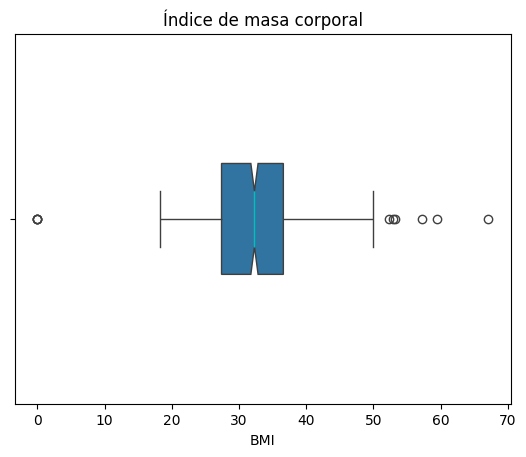

In [37]:
sns.boxplot(x=df["BMI"], data=df,notch = True,
            linewidth=1,
            medianprops={"color": "c", "linewidth": 1},
            width=0.3).set_title("Índice de masa corporal")

plt.show();

In [38]:
df["BMI"][df["BMI"] < 10].value_counts()

0.0    4
Name: BMI, dtype: int64

In [39]:
df["BMI"][df["BMI"] > 50].value_counts()

53.2    1
67.1    1
52.3    1
52.9    1
59.4    1
57.3    1
Name: BMI, dtype: int64

Podemos ver que tenemos valores outliers tanto hacia la izquierda como hacia la derecha. EL valor mínimo es 0.0 y el máximo es 67.1. En el caso del BMI(IMC en español) no existen valores mínimos ni máximos ya que este valor es una relación entre el peso y la altura de la persona([Fuente](https://nutriactiva.com/es/blogs/bmi/bmi-equation-and-table-chart)). Sí podemos decir que los valores extremos son alarmas para los pacientes ya que suelen indicar algún tipo de problema, sin embargo, no hay ningún valor fuera de rango y por lo tanto se mantienen todos los registros

In [40]:
diccionario.iloc[6:7,:]

,Nombre columna,Tipo de dato,Descripción
6,DiabetesPedigreeFunction,flotante,Función pedigree Diabetes


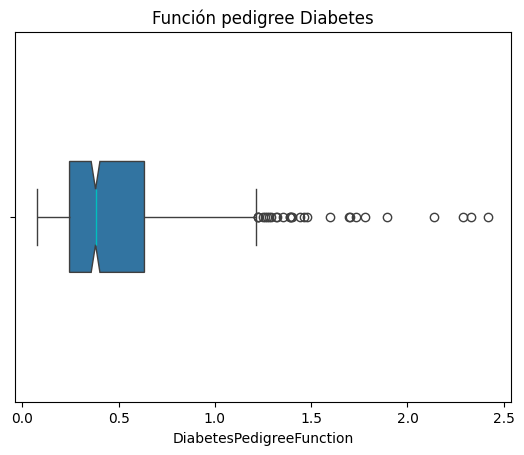

In [41]:
sns.boxplot(x=df["DiabetesPedigreeFunction"], data=df,notch = True,
            linewidth=1,
            medianprops={"color": "c", "linewidth": 1},
            width=0.3).set_title("Función pedigree Diabetes")

plt.show();

Encontramos muchos valores outliers hacia la derecha, los cuales no representan ningún problema ya que esta característica muestra la función que representa la probabilidad de tener o no diabetes basado en el historial familiar. Estos registros se mantienen

In [42]:
diccionario.iloc[7:8,:]

,Nombre columna,Tipo de dato,Descripción
7,Age,int,Edad


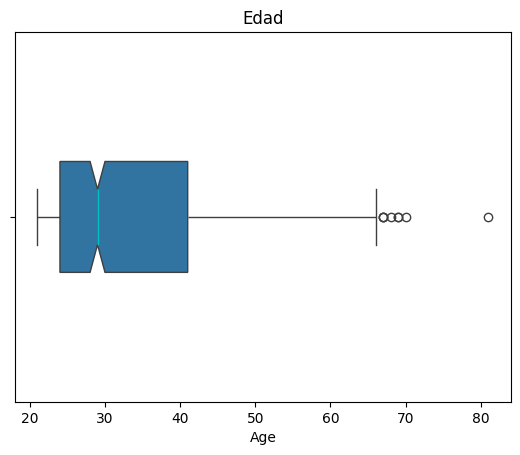

In [43]:
sns.boxplot(x=df["Age"], data=df,notch = True,
            linewidth=1,
            medianprops={"color": "c", "linewidth": 1},
            width=0.3).set_title("Edad")

plt.show();

Podemos encontrar algunos valores ouotlier hacia la derecha los cuales se mantienen dentro de los rangos esperados para la edad de una persona

In [44]:
diccionario.iloc[8:9,:]

,Nombre columna,Tipo de dato,Descripción
8,Outcome,int,"Diabetes (0 = no, 1 = sí) (objetivo)"


Esta es nuestra columna objetivo y por lo tanto vamos a ver únicamente si sus valores son los que deberían ser

In [45]:
df["Outcome"].unique()

array([1, 0])

Perfecto, hemos concluido nuestro eda y estamos listos para preprocesar nuestros datos.

Vamos a separar nuestra columna objetivo y luego vamos a separar en datos de entrenamiento, prueba y validación

In [46]:
X=df.drop(columns="Outcome")
y=df["Outcome"]
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.3, stratify=y, random_state=21)
X_test, X_val, y_test, y_val= train_test_split(X_test, y_test, test_size=0.66, random_state=21)

Ahora vamos a crear nuestro pipeline de preprocesamiento



In [47]:
cat_selector = make_column_selector(dtype_include='object')
int_selector = make_column_selector(dtype_include='int')
float_selector = make_column_selector(dtype_include='float')

one_hot_encoder = OneHotEncoder()
standard_scaler = StandardScaler()

imputer_int= SimpleImputer(strategy='median')
imputer_float= SimpleImputer(strategy='mean')
imputer_cat= SimpleImputer(strategy='most_frequent')

col_transformer = make_column_transformer((make_pipeline(imputer_int, standard_scaler), int_selector),
                                          (make_pipeline(imputer_float,standard_scaler), float_selector),
                                          (make_pipeline(imputer_cat,one_hot_encoder), cat_selector),
                                          remainder = 'passthrough')

pipeline=make_pipeline(col_transformer)

pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x781d88f1b2b0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x781d88f19b70>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x781d88f1be50>)]))])

Ahora entrenamos nuestro pipeline con los datos de entrenamiento

In [48]:
pipeline.fit(X_train)
X_train_processed = pipeline.transform(X_train)
X_test_processed = pipeline.transform(X_test)
X_val_processed = pipeline.transform(X_val)

Ahora pasamos nuestros arreglos de numpy a DataFrames de pandas

In [49]:
X_train_df = pd.DataFrame(X_train_processed, columns=pipeline.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_processed, columns=pipeline.get_feature_names_out())
X_val_df = pd.DataFrame(X_val_processed, columns=pipeline.get_feature_names_out())

Comprobamos

In [50]:
X_train_df.head(3)

,pipeline-1__Pregnancies,pipeline-1__Glucose,pipeline-1__BloodPressure,pipeline-1__SkinThickness,pipeline-1__Insulin,pipeline-1__Age,pipeline-2__BMI,pipeline-2__DiabetesPedigreeFunction
0,-1.183174,0.103403,1.017696,0.478533,1.054051,-0.788089,-0.222693,0.090849
1,-0.879888,-0.540163,-0.178283,0.413582,0.395330,-0.963683,0.287381,-1.017776
2,-1.183174,-0.701055,-0.605418,0.413582,-0.716262,-0.963683,-1.111677,-0.739153


In [51]:
X_test_df.tail(3)

,pipeline-1__Pregnancies,pipeline-1__Glucose,pipeline-1__BloodPressure,pipeline-1__SkinThickness,pipeline-1__Insulin,pipeline-1__Age,pipeline-2__BMI,pipeline-2__DiabetesPedigreeFunction
70,0.636541,-0.282737,1.359404,-1.405049,-0.716262,2.899376,-0.645325,-0.709825
71,-0.576603,-1.248087,-1.886823,0.088826,-0.090477,-1.051479,-0.266413,1.404776
72,-0.273317,1.551428,-0.007428,0.738338,0.395330,-0.788089,0.156219,-0.850602


Ahora que nuestros datos están debidamente procesados, vamos a elegir un modelo de clasificación según nuestros datos ya que este es un indicador clave para elegir un modelo que realmente sea capaz de resolver el problema. En este caso y dado que tenemos menos de mil registros, vamos a crear un modelo de regresión logística.

Vamos a ver la correlación de nuestros datos

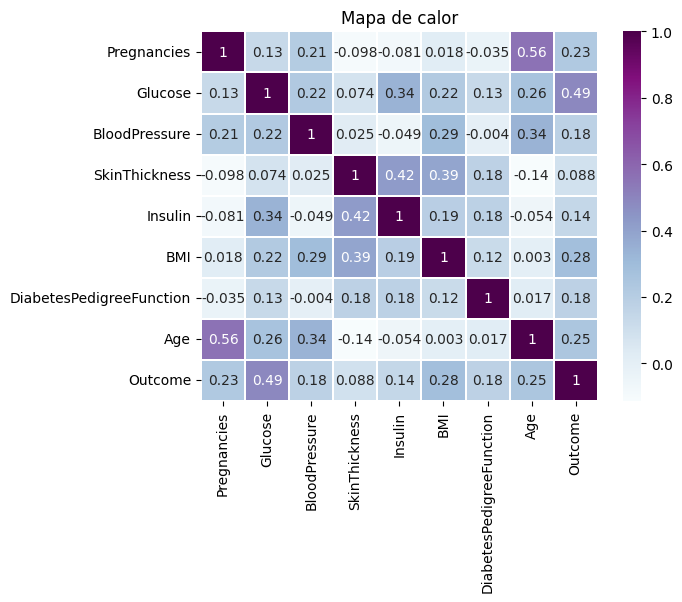

In [52]:
corr =  df.corr(numeric_only=True)
sns.heatmap(corr, cmap = "BuPu", annot = True,
            xticklabels= df.columns,
            yticklabels= df.columns,
            robust=True,
            linewidths=0.005,
            linecolor= "White"
            ).set_title("Mapa de calor")
plt.show();

indicadores de correlación:

*   correlación despreciable: r < |0.1|
*   correlación baja: |0.1| < r <= |0.3|
*   correlación mediana : |0.3| < r <= |0.5|
*   correlación fuerte o alta: r > |0.5|

Podemos ver que la glucosa es la única característica que muestra una correlación mediana y casi alta con nuestro resultado.

Sí podemos ver otras relaciones moderadas y altas entre las demás características como por ejemplo en la correlación entre la edad y los embarazos que tiene un coeficiente de correlación de 0.56

In [53]:
logreg = LogisticRegression()

logreg.fit(X_train_df, y_train)

test_preds = logreg.predict(X_test_df)

test_score = accuracy_score(y_test, test_preds)

print (f'The testing accuracy is {test_score:.3f}.')

The testing accuracy is 0.699.


In [54]:
print("Reporte de clasificación para Regresor Logístico \n")
print(classification_report(y_test,test_preds))

Reporte de clasificación para Regresor Logístico 

              precision    recall  f1-score   support

           0       0.71      0.87      0.78        45
           1       0.67      0.43      0.52        28

    accuracy                           0.70        73
   macro avg       0.69      0.65      0.65        73
weighted avg       0.69      0.70      0.68        73



Conseguimos un accuracy de 0.753 con los parámetros por defecto. Ahora vamos a buscar los mejores parámetros para nuestro modelo usando gridsearch

In [55]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [56]:
# hiperparámetros a probar
param_grid =  {"C" : [0.3, 0.6, 0.9], "solver" : ["liblinear", "newton-cg", "lbfgs", "sag", "saga"],
               "max_iter" : [50, 100, 150, 200], }
grid_search = GridSearchCV(logreg, param_grid, cv=5, return_train_score=True, error_score='raise')
grid_search.fit(X_test_df,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
             param_grid={'C': [0.3, 0.6, 0.9], 'max_iter': [50, 100, 150, 200],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             return_train_score=True)

In [57]:
print("Mejor modelo: ", grid_search.best_estimator_)
print("Mejor score: ",grid_search.best_score_)
print("Mejores parámetros: ",grid_search.best_params_)

Mejor modelo:  LogisticRegression(C=0.3, max_iter=50, solver='liblinear')
Mejor score:  0.7676190476190475
Mejores parámetros:  {'C': 0.3, 'max_iter': 50, 'solver': 'liblinear'}


Ahora que ya tenemos los mejores parámetros, vamos a validad nuestro modelo con los datos de validación

In [58]:
logreg = LogisticRegression(C= 0.3, max_iter= 50, solver= 'liblinear')

logreg.fit(X_train_df, y_train)

val_preds = logreg.predict(X_val_df)

val_score = accuracy_score(y_val, val_preds)

print (f'The testing accuracy is {val_score:.3f}.')

print("Reporte de clasificación para Regresor Logístico \n")
print(classification_report(y_val, val_preds))

The testing accuracy is 0.826.
Reporte de clasificación para Regresor Logístico 

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        97
           1       0.82      0.60      0.69        47

    accuracy                           0.83       144
   macro avg       0.83      0.77      0.79       144
weighted avg       0.83      0.83      0.82       144



Análisis de resultados:

*   Precision: Este indicador muestra la proporción de predicciones correctas respecto de las predicciones totales. En este caso podemos ver que nuestro modelo es mejor clasificando a las personas que tienen diabetes que a las que no tienen

*   Recall: Este indicador, también conocido como sensibilidad, se refiere a la proporción de instancias positivas que fueron correctamente identificadas por el modelo con respecto al total real de instancias positivas en los datos. En este caso podemos ver que nuestra clasificación de negativos fue muy alta mientras que la de negativos casi es la del azar, por lo tanto malísima




Ponemos nuestro modelo en el pipeline

In [59]:
pipeline_logreg = make_pipeline(col_transformer, logreg)
pipeline_logreg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x781d88f1b2b0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImp...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x781d88f19b70>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x781d88f1be50>)])),
                ('logisticregression',
                 LogisticRegression(C=0.3, max_iter=50, solver='liblinear'))])

Ahora veamos la curva ROC de nuestro modelo

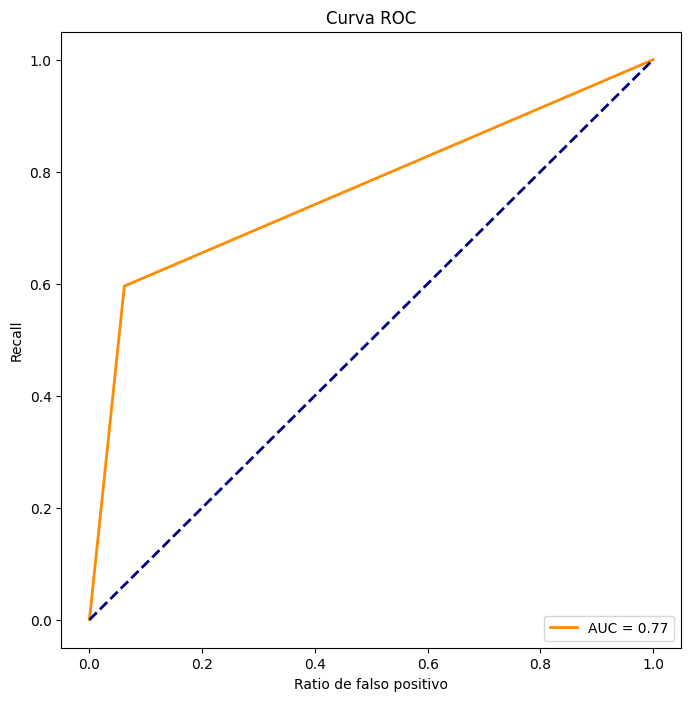

In [60]:
#curva roc
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, val_preds)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Ratio de falso positivo')
plt.ylabel('Recall')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Al ves este gráfico podemos ver un gran área bajo la curva en un principio y luego más cerca de la diagonal. Esto no es demasiado bueno, ya que queremos estar tan lejos de la diagonal como sea posible, ya que a mayor área bajo la curva mejor es nuestro modelo. En este caso no vemos datos espectaculares, algo que ya podríamos haber esperado dado los scores que obtuvimos en testeo y validación

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


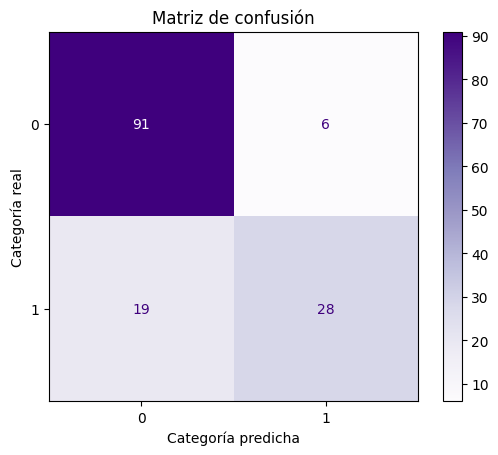

In [61]:
ConfusionMatrixDisplay.from_estimator(pipeline_logreg, X_val, y_val, cmap = 'Purples');
plt.title("Matriz de confusión")
plt.xlabel('Categoría predicha')
plt.ylabel('Categoría real')
plt.show();

Al ver nuestra matriz de confusión nos vamos a centrar en la diagonal que va desde la esquina superior izquiera a la esquina inferior derecha, donde podremos ver sin problemas que nuestros verdaderos negativos son muy altos, 75 de 81, información que confirma lo que ya habíamos visto y es que nuestro modelo es bueno clasificando a las personas que no tienen diabetes. Sin embargo, una realidad muy distinta se vive en la parte inferior de nuestra matriz donde vemos que logramos identificar de forma correcta sólo 34 personas con diabetes de 63, casi la mitad, lo que nos muestra que la capacidad de nuestro modelo de predecir la enfermadad es casi la misma que obtenemos al clasificar al azar y por lo tanto un paupérrimo resultado.

Como conclusión, este modelo debe ser afinado antes de poder salir a producción ya que estos números no son los que quiséramos presentar al directorio.